Guillermo Corona González 
A01379689
Situacion problema 

Introduccion 
1.A lo largo de este reporte estructurado por distintas variables y códigos. Se buscara sacar la información más relevante de una base de datos, en este caso del COVID-19 en México. Donde se analizaran las variables tales como estado, días, mes, tiempo, año entre otras. Por otro lado, se planteara un escenario donde se contestaran las dos preguntas más significativas para sacar el mejor provecho de la base de datos tomando en cuentas las principales necesidades de los stakeholders.

2.Estudio de variables
Las variables críticas que se analizaron fueron: Estados, meses, años y casos diarios.

Variables discretas:
-Casos diarios

Variable cuantitativa:
-Años

Variables cualitativas:
-meses
-Estados


3.Modelos utilizados para predecir las variables críticas

Modelo de pastel y gráfica de barras

4.Escenarios que consideraste

-¿En qué estado se encuentra la mayor parte de la población infectada?
-¿Cuál es el estado que genera más casos diarios?
-¿En qué mes hubo más contagios de COVID?
-¿En qué mes y año se registraron menor cantidad de contagios?

5.Stakeholders

-Gobierno
-Empresas y negocios de la industria del sector salud y farmacéutica
-Ciudadanía
-Organizaciones internacionales como la ONU
-Países vecinos
-Sector aerocomercial

In [2]:
import numpy as ny
import pandas as pd 
import seaborn as sns

file_path = "datasets/SP Base de datos.csv"

df = pd.read_csv(file_path)
df.head()

,Year,Quarter ID,Quarter,Month ID,Month,Day,Time ID,Time,Nation ID,Nation,State ID,State,Accum Cases,Daily Cases,AVG 7 Days Accum Cases,AVG 7 Days Daily Cases,Rate Daily Cases,Rate Accum Cases,Days from 50 Cases,Style
0,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,9,Ciudad de México,124,10,69.285713,14.714286,0.110881,1.374929,4,solid
1,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,15,Estado de México,51,10,30.000000,5.428571,0.057380,0.292636,1,solid
2,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,17,Morelos,2,0,1.285714,0.285714,0.000000,0.097845,0,solid
3,2020,1,Q1,3,2020-03,16,20200316,16/03/2020,mex,México,9,Ciudad de México,152,28,87.714287,18.428572,0.310468,1.685397,5,solid
4,2020,1,Q1,3,2020-03,16,20200316,16/03/2020,mex,México,15,Estado de México,58,7,36.285713,6.285714,0.040166,0.332802,2,solid


Pregunta 1.
¿Cual es el estado que genera más casos diarios?

In [3]:
data =df.sample(n=500,
                random_state=42)

In [4]:
data.shape

(500, 20)

In [5]:
data.columns

Index(['Year', 'Quarter ID', 'Quarter', 'Month ID', 'Month', 'Day', 'Time ID',
       'Time', 'Nation ID', 'Nation', 'State ID', 'State', 'Accum Cases',
       'Daily Cases', 'AVG 7 Days Accum Cases', 'AVG 7 Days Daily Cases',
       'Rate Daily Cases', 'Rate Accum Cases', 'Days from 50 Cases', 'Style'],
      dtype='object')

In [6]:
df.head()

,Year,Quarter ID,Quarter,Month ID,Month,Day,Time ID,Time,Nation ID,Nation,State ID,State,Accum Cases,Daily Cases,AVG 7 Days Accum Cases,AVG 7 Days Daily Cases,Rate Daily Cases,Rate Accum Cases,Days from 50 Cases,Style
0,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,9,Ciudad de México,124,10,69.285713,14.714286,0.110881,1.374929,4,solid
1,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,15,Estado de México,51,10,30.000000,5.428571,0.057380,0.292636,1,solid
2,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,17,Morelos,2,0,1.285714,0.285714,0.000000,0.097845,0,solid
3,2020,1,Q1,3,2020-03,16,20200316,16/03/2020,mex,México,9,Ciudad de México,152,28,87.714287,18.428572,0.310468,1.685397,5,solid
4,2020,1,Q1,3,2020-03,16,20200316,16/03/2020,mex,México,15,Estado de México,58,7,36.285713,6.285714,0.040166,0.332802,2,solid


In [7]:
df.set_index("Nation",inplace = True)

In [8]:
df.head(2)

,Year,Quarter ID,Quarter,Month ID,Month,Day,Time ID,Time,Nation ID,State ID,State,Accum Cases,Daily Cases,AVG 7 Days Accum Cases,AVG 7 Days Daily Cases,Rate Daily Cases,Rate Accum Cases,Days from 50 Cases,Style
Nation,,,,,,,,,,,,,,,,,,,
México,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,9,Ciudad de México,124,10,69.285713,14.714286,0.110881,1.374929,4,solid
México,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,15,Estado de México,51,10,30.000000,5.428571,0.057380,0.292636,1,solid


In [9]:
df["Total"]=df.iloc[:,4:].sum(axis = 1)

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("ggplot")


In [11]:
df_State = df.groupby("State",
                      axis=0).sum()

In [12]:
df_State

,Year,Quarter ID,Month ID,Day,Time ID,State ID,Accum Cases,Daily Cases,AVG 7 Days Accum Cases,AVG 7 Days Daily Cases,Rate Daily Cases,Rate Accum Cases,Days from 50 Cases,Total
State,,,,,,,,,,,,,,
Ciudad de México,1050628,1256,3233,8187,10506611487,4680,174749538,846661,1.722127e+08,842969.143315,9387.895873,1.937647e+06,137020,1.085736e+10
Estado de México,1050628,1256,3233,8187,10506611487,7800,74659011,316508,7.371048e+07,315285.428405,1816.110937,4.283906e+05,135460,1.065619e+10
Morelos,1050628,1256,3233,8187,10506611487,8840,8339619,39728,8.220523e+06,39596.571450,1943.584769,4.079933e+05,124251,1.052380e+10


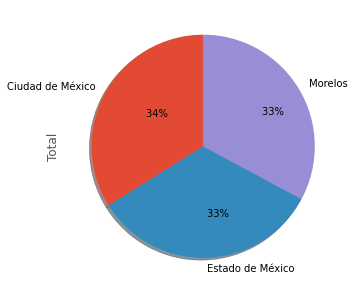

In [13]:
#Gráfica de pastel para conocer el Estado que más contagios tiene al día.
color_list=["gold,","yellowgreen","lightcoral","lightgreen","pink","red"]
expode_list =[0.1, 0, 0, 0, 0.2, 0.3]
df_State["Total"].plot(kind = "pie",
                      figsize=(5,6),
                      autopct="%10.lf%%",
                      startangle = 90,
                      shadow = True
                      )

Pregunta 2.
¿En qué mes hubo más contagios de COVID?

In [14]:
import numpy as ny
import pandas as pd 
import seaborn as sns

file_path = "datasets/SP Base de datos.csv"

df = pd.read_csv(file_path)
df.head()

,Year,Quarter ID,Quarter,Month ID,Month,Day,Time ID,Time,Nation ID,Nation,State ID,State,Accum Cases,Daily Cases,AVG 7 Days Accum Cases,AVG 7 Days Daily Cases,Rate Daily Cases,Rate Accum Cases,Days from 50 Cases,Style
0,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,9,Ciudad de México,124,10,69.285713,14.714286,0.110881,1.374929,4,solid
1,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,15,Estado de México,51,10,30.000000,5.428571,0.057380,0.292636,1,solid
2,2020,1,Q1,3,2020-03,15,20200315,15/03/2020,mex,México,17,Morelos,2,0,1.285714,0.285714,0.000000,0.097845,0,solid
3,2020,1,Q1,3,2020-03,16,20200316,16/03/2020,mex,México,9,Ciudad de México,152,28,87.714287,18.428572,0.310468,1.685397,5,solid
4,2020,1,Q1,3,2020-03,16,20200316,16/03/2020,mex,México,15,Estado de México,58,7,36.285713,6.285714,0.040166,0.332802,2,solid


In [15]:
data.columns

Index(['Year', 'Quarter ID', 'Quarter', 'Month ID', 'Month', 'Day', 'Time ID',
       'Time', 'Nation ID', 'Nation', 'State ID', 'State', 'Accum Cases',
       'Daily Cases', 'AVG 7 Days Accum Cases', 'AVG 7 Days Daily Cases',
       'Rate Daily Cases', 'Rate Accum Cases', 'Days from 50 Cases', 'Style'],
      dtype='object')

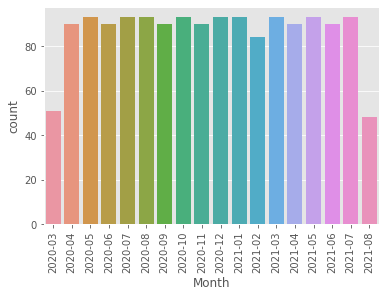

In [16]:
#Gráfica de barras para concoer el mes de más contagios
sns.countplot(x ="Month",
             data = df)
plt.xticks(rotation = 90)
plt.yticks(rotation = 360)
plt.show()

Conclusion
Al terminar de analizar y sacar los resultados, encontré varios puntos clave y de gran importancia para los stakeholders.
El primero de ellos, es que el estado donde más casos por COVID hay al día es en la ciudad de México, colocando a
Morelos y al Estado de México en segundo lugar ya que tienen el mismo porcentaje. Por otro lado, al identificar los meses de contagio y sacar la gráfica de barras, me percate que los contagios suben y bajan siguiendo un patrón.

Pero los dos meses que más contagio fueron en diciembre del 2020 y en enero del 2021 debido a las vacaciones.
Del mismo modos, estos contagios empezaron a reducir debido a las vacunas ya aplicadas doctores. Y no fue hasta julio que las cifras bajaron drásticamente.